# Doğrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings # Uyarı almamak için
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## K-NN Model

In [5]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [7]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [8]:
knn_model.n_neighbors

5

In [20]:
knn_model.metric

'minkowski'

In [10]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [11]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

## Model Tuning

In [22]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k , " için RMSE değeri ",rmse)
    

k= 1  için RMSE değeri  455.03925390751965
k= 2  için RMSE değeri  415.99629571490965
k= 3  için RMSE değeri  420.6765370082348
k= 4  için RMSE değeri  428.8564674588792
k= 5  için RMSE değeri  426.6570764525201
k= 6  için RMSE değeri  423.5071669008732
k= 7  için RMSE değeri  414.9361222421057
k= 8  için RMSE değeri  413.7094731463598
k= 9  için RMSE değeri  417.84419990871265
k= 10  için RMSE değeri  421.6252180741266


In [23]:
#GridSearchCV

In [25]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [26]:
knn = KNeighborsRegressor()

In [27]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [28]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [29]:
# Final Model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [31]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

## Support Vector

In [32]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
svr_model = SVR("linear").fit(X_train,y_train)

In [43]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred=svr_model.predict(X_train)

In [45]:
y_pred[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [46]:
svr_model.intercept_

array([-80.15196151])

In [47]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [49]:
# Test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

### Tuning

In [50]:
svr_model = SVR("linear")
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
svr_params = {"C": [0.1,0.5,1,3]}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [54]:
svr_cv_model.best_params_

{'C': 0.5}

In [55]:
svr_tuned = SVR("linear",C=0.5).fit(X_train,y_train)

In [56]:
y_pred = svr_tuned.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.9874739022889

## Yapay Sinir Ağları

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Model ve Tahmin

In [3]:
scaler = StandardScaler()

In [5]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [6]:
X_test_scaled = scaler.transform(X_test)

In [7]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
mlp_model.predict(X_test_scaled)[0:5]

array([22.24909192, 36.94824143, 70.53938981, 14.45552391, 23.91522794])

In [12]:
y_pred = mlp_model.predict(X_test_scaled)

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

659.2922251854561

### Model Tuning

In [21]:
mlp_params = {"alpha" : [0.1,0.01,0.02,0.001,0.0001],
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)]}

In [22]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose = 2,n_jobs =-1).fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.5s finished
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [31]:
mlp_tuned = MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
y_pred=mlp_tuned.predict(X_test_scaled)

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

369.83172062425365

## CART

In [34]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [41]:
# Model ve Tahmin
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)

In [42]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
# Tek DEğişkenli Tahmin
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [44]:
y_pred = cart_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0663148428844

In [52]:
# Tüm değişkenlerle
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [48]:
y_pred = cart_model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

452.5931097792827

### Model Tuning

In [50]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

391.5530522634766

In [55]:
cart_params = {"max_depth":[1,3,4,5,10,20],"min_samples_split":[2,10,5,30,50,100]}

In [56]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [58]:
cart_tuned = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [59]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511435

## Random Forest

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Model & Tahmin

In [5]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [6]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [7]:
y_pred = rf_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.04044281427

### Model Tuning

In [11]:
rf_params = {"max_depth": [5,8],
            "max_features": [2,5],
            "n_estimators":[200,500,1000],
            "min_samples_split":[2,10,80]}

In [12]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   45.8s finished


In [13]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [14]:
rf_model = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned=rf_model.fit(X_train,y_train)

In [15]:
y_pred = rf_tuned.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

348.2372919119422

#### Değişken Önem Düzeyi

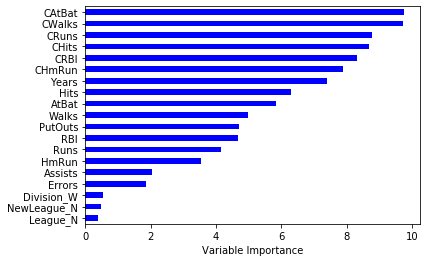

In [20]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                      axis=0,
                      ascending = True).plot(kind = 'barh',
                                           color = 'b',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None

## Gradient Boosting Machines

In [23]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Model & Tahmin

In [24]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [25]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred = gbm_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

347.08656976717464

### Model Tuning

In [34]:
gbm_params = {"learning_rate":[0.1,0.01],
             "max_depth":[3,5],
             "n_estimators":[200,500],
             "subsample":[1,0.5,0.8]}

In [35]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [36]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,
                            n_jobs=1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total=   0.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1 ...
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1, total= 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.2min finished


In [37]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}

In [38]:
gbm_tuned = GradientBoostingRegressor(learning_rate =0.01,
                                     max_depth = 5,
                                     n_estimators=500,
                                     subsample=0.5,
                                     loss="lad").fit(X_train,y_train)

In [39]:
y_pred = gbm_tuned.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

323.2318315260327

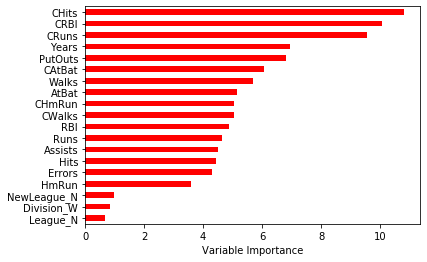

In [42]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                         index=X_train.columns)

Importance.sort_values(by='Importance',
                      axis=0,
                      ascending = True).plot(kind = 'barh',
                                           color = 'r',)

plt.xlabel('Variable Importance')
plt.gca().legend_=None

## XGBoost

In [6]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
!pip install xgboost

In [10]:
import xgboost
from xgboost import XGBRegressor

In [8]:
xgb = XGBRegressor().fit(X_train,y_train)

[01:47:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

359.91750599447033

### Model Tuning

In [11]:
xgb_params = {"learning_rate": [0.1,0.01,0.5] ,
             "max_depth":[2,3,4,5,8],
             "n_estimators":[100,200,500],
             "colsample_bylevel":[0.4,0.7]}

In [12]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs =-1,verbose =2).fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.6s


[01:51:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   34.9s finished


In [13]:
xgb_cv_model.best_params_

{'colsample_bylevel': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [14]:
xgb_tuned = XGBRegressor(colsample_bylevel=0.7,
                        learning_rate=0.1,
                        max_depth=2,
                        n_estimators=500).fit(X_train,y_train)

[01:52:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

333.4542345754869

## Light GBM

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
!pip install lightgbm

In [17]:
from lightgbm import LGBMRegressor

### Model ve Tahmin

In [8]:
lgb_model = LGBMRegressor().fit(X_train,y_train)

In [9]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [10]:
y_pred = lgb_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

### Model Tuning

In [12]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
              "n_estimators":[40,100,1000],
              "max_depth":[1,2,3]}

In [13]:
lgbm_cv_model = GridSearchCV(lgb_model,lgbm_params,cv = 10,n_jobs =-1,
                            verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.1s finished


In [14]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

In [15]:
lgb_tuned = LGBMRegressor(learning_rate=0.1,
                         max_depth=3,
                         n_estimators=40).fit(X_train,y_train)

In [17]:
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

364.7698635536198

## CatBoost

In [18]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp36-none-any.whl size=11435 sha256=fa4031653af1334105324d978e9192b20f9cb44a9b5ed2fef85b54509298a509
  Stored in directory: C:\Users\asus\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [8]:
from catboost import CatBoostRegressor

In [22]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 55.6ms	remaining: 55.5s
1:	learn: 432.4168868	total: 57.7ms	remaining: 28.8s
2:	learn: 426.3836690	total: 59.8ms	remaining: 19.9s
3:	learn: 420.2261014	total: 61.6ms	remaining: 15.3s
4:	learn: 414.9976675	total: 63.3ms	remaining: 12.6s
5:	learn: 409.6125323	total: 65.3ms	remaining: 10.8s
6:	learn: 403.9277911	total: 67.1ms	remaining: 9.52s
7:	learn: 398.4395285	total: 69.9ms	remaining: 8.66s
8:	learn: 392.4517081	total: 71.8ms	remaining: 7.91s
9:	learn: 387.4871123	total: 73.3ms	remaining: 7.26s
10:	learn: 382.6230510	total: 74.8ms	remaining: 6.72s
11:	learn: 378.1012454	total: 76.1ms	remaining: 6.26s
12:	learn: 372.6002306	total: 77.6ms	remaining: 5.89s
13:	learn: 368.4682192	total: 79.2ms	remaining: 5.58s
14:	learn: 364.0565766	total: 81.9ms	remaining: 5.38s
15:	learn: 359.5683249	total: 83.8ms	remaining: 5.16s
16:	learn: 355.1782794	total: 85.5ms	remaining: 4.94s
17:	learn: 350.4689946	total: 87ms	remaining: 4.74s
18:	learn:

In [23]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

350.2683163098795

### Tuning

In [28]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [29]:
catb_model = CatBoostRegressor()

In [30]:
catb_cv_model = GridSearchCV(catb_model,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   55.7s finished


0:	learn: 425.7900818	total: 1.25ms	remaining: 250ms
1:	learn: 404.8723520	total: 2.15ms	remaining: 213ms
2:	learn: 387.4057666	total: 3.48ms	remaining: 229ms
3:	learn: 372.2801584	total: 4.62ms	remaining: 226ms
4:	learn: 358.9204229	total: 5.34ms	remaining: 208ms
5:	learn: 347.0083933	total: 6.09ms	remaining: 197ms
6:	learn: 336.0130818	total: 6.84ms	remaining: 189ms
7:	learn: 324.3923300	total: 7.53ms	remaining: 181ms
8:	learn: 314.8690957	total: 8.19ms	remaining: 174ms
9:	learn: 308.5075563	total: 8.88ms	remaining: 169ms
10:	learn: 298.8587285	total: 9.62ms	remaining: 165ms
11:	learn: 294.7655438	total: 10.4ms	remaining: 164ms
12:	learn: 288.0697862	total: 11.1ms	remaining: 160ms
13:	learn: 282.6697154	total: 11.8ms	remaining: 156ms
14:	learn: 277.6121667	total: 12.7ms	remaining: 156ms
15:	learn: 273.4383979	total: 13.6ms	remaining: 156ms
16:	learn: 269.1556201	total: 14.4ms	remaining: 155ms
17:	learn: 264.8098704	total: 15.2ms	remaining: 153ms
18:	learn: 261.6700768	total: 15.9ms	r

In [31]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [32]:
catb_tuned = CatBoostRegressor(depth=3,
                              iterations=200,
                              learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.69ms	remaining: 337ms
1:	learn: 404.8723520	total: 2.44ms	remaining: 242ms
2:	learn: 387.4057666	total: 3.51ms	remaining: 231ms
3:	learn: 372.2801584	total: 4.15ms	remaining: 204ms
4:	learn: 358.9204229	total: 4.78ms	remaining: 187ms
5:	learn: 347.0083933	total: 5.38ms	remaining: 174ms
6:	learn: 336.0130818	total: 6ms	remaining: 165ms
7:	learn: 324.3923300	total: 6.59ms	remaining: 158ms
8:	learn: 314.8690957	total: 7.18ms	remaining: 152ms
9:	learn: 308.5075563	total: 7.81ms	remaining: 148ms
10:	learn: 298.8587285	total: 8.41ms	remaining: 145ms
11:	learn: 294.7655438	total: 9.47ms	remaining: 148ms
12:	learn: 288.0697862	total: 10.5ms	remaining: 151ms
13:	learn: 282.6697154	total: 11.3ms	remaining: 151ms
14:	learn: 277.6121667	total: 11.9ms	remaining: 147ms
15:	learn: 273.4383979	total: 12.6ms	remaining: 145ms
16:	learn: 269.1556201	total: 13.3ms	remaining: 143ms
17:	learn: 264.8098704	total: 13.9ms	remaining: 141ms
18:	learn: 261.6700768	total: 14.5ms	rema

In [33]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482

# Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [11]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [14]:
def compML(df, y, alg):
    # Train-Test Ayrımı
    y = df[y]
    X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    # Modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi = alg.__name__
    print(model_ismi,'Modeli Test Hatası:', RMSE)
    return RMSE

In [15]:
compML(df,"Salary",SVR)

SVR Modeli Test Hatası: 473.4445984431814


473.4445984431814

In [21]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [22]:
for i in models:
    compML(df,"Salary",i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[21:23:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 356.1580307055832
RandomForestRegressor Modeli Test Hatası: 361.1838802165612
DecisionTreeRegressor Modeli Test Hatası: 525.9720923938663
MLPRegressor Modeli Test Hatası: 367.83784472332303
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 473.4445984431814
